In [155]:
#* Import and settings
import os
from os import path
import re

import numpy as np
from scipy.optimize import curve_fit
import sympy as sp
from sympy import Symbol as s
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from lab_tools import graph, lab_round

%matplotlib widget

width = 469.75502 # To get the page width insert "\the\textwidth" in your LaTeX document
graph_path = "../graphs/"
data_path = "../data/"

mpl.rcParams.update({
    # Show minor ticks
    "ytick.minor.visible": True,
    "xtick.minor.visible": True,
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 11,
    "font.size": 11,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    # High resolution .png
    "savefig.dpi": 600,
    # Default image size
    "figure.figsize": graph.size(width),
})

In [156]:
sorted_data_path = path.join(data_path, "sorted")

def get_df_list(slit, sensor_slit) -> pd.DataFrame:
    df_list = [
        pd.read_csv(
            path.join(sorted_data_path, file),
            sep=r"\s*,\s*",
            engine="python",
        ) for file in os.listdir(sorted_data_path)
        if re.search(f"{slit:.2f}_{sensor_slit:.1f}_[\\d]+_[\\w]", file)
    ]

    return df_list

In [157]:
df_list = get_df_list(0.04, 1.5)

dy = 1.5 / 10**3
y_arr = np.arange(
    np.max([
        df.y.min()
        for df in df_list
    ]),
    np.min([
        df.y.max()
        for df in df_list
    ]),
    dy
)

# y_arr, dy = np.linspace(
#     np.max([
#         df.y.min()
#         for df in df_list
#     ]),
#     np.min([
#         df.y.max()
#         for df in df_list
#     ]),
#     200,
#     retstep=True
# )

# I_list = [
#     [
#         df.I[df.y.between(y - dy/2, y + dy/2)].mean()
#         for y in y_arr
#     ]
#     for df in df_list
# ]

r = dy/2

I_max = [
    np.max([
        np.nanmean(
            df[df.y.between(y - r, y + r)].I.to_numpy()
        )
        for df in df_list
    ])
    for y in y_arr
]

I_min = [
    np.min([
        np.nanmean(
            df[df.y.between(y - r, y + r)].I.to_numpy()
        )
        for df in df_list
    ])
    for y in y_arr
]

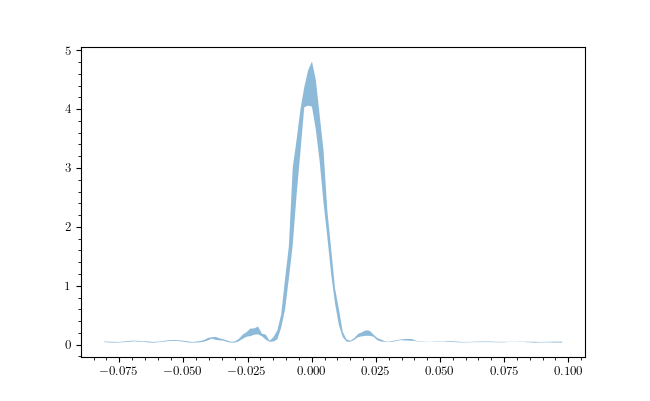

In [158]:
fig, ax = plt.subplots(1, 1)

ax.fill_between(y_arr, I_min, I_max, alpha=0.5)
for df in df_list:
    # ax.scatter(df.y, df.I, s=2, alpha=0.2)
    pass
